<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.2: Redes Neuronales</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema d: Red Neuronal con Keras</center></font></b>
</div>

## RED NEURONAL CON KERAS

### La Librería Keras
<br>
<img src="./Imagenes/Keras.png" style="width:500px;height:145px;" class="center">
<br>

**Keras** es una librería de alto nivel para **Redes Neuronales**, la cual está escrita en **Python** y puede ejecutarse con otras librerías como **TensorFlow**, **CNTK** o **Theano**. Fue desarrollada para experimentaciones rápidas, para con ello poder ir de una idea a un resultado en la menor cantidad de tiempo pero con resultados adecuados.

**Keras** es ideal para librerías de **Aprendizaje Profundo (Deep Learning)** ya que:
* Permite un prototipado rápido y sencillo, incluyendo modularidad, extensibilidad y un esquema sencillo para el usuario. 
* Permite la implementación de **Redes Convolucionales** y **Redes Recurrentes**, así como combinaciones de ambas.
* Se puede ejecutar en CPU y GPU.

La documentación de **Keras** se puede encontrar a través [de esta liga](https://keras.io).

#### Primer Implementación
Para este ejemplo se emplearán datos para un clasificador de rangos de precios de celulares (*mobile price range*). El **DataSet** de ***entrenamiento*** consiste de 21 columnas y 2000 registros, los cuales fueron obtenidos del portal Kaggle.
<br>
<img src="./Imagenes/Kaggle_logo.png" style="width:240px;height:86px;" class="center">
<br>

Las columnas de información contienen los siguientes datos:

* **battery_power**: Total de energía que la batería puede almacenar [mAh].
* **blue**: Soporte para Bluetooth [0,1]. 
* **clock_speed**: Velocidad del microprocesador [GHz].
* **dual_sim**: Soporte para tarjeta SIM dual [0,1].
* **fc**: Cantidad de megapixeles de la cámara frontal [MP].
* **four_g**: Soporte para red 4G [0,1].
* **int_memory**: Cantidad de memoria interna [GB]. 
* **m_dep**: Profundidad móvil [cm].
* **mobile_wt**: Peso del dispositivo [gr].
* **n_cores**: Número de núcleos del procesador [1..8].
* **pc**: Cantidad de megapixeles de la cámara principal [MP].
* **px_height**: Alto de la resolución [pixeles].
* **px_width**: Ancho de la resolución [pixeles].
* **ram**: Cantidad de memoria del dispositivo [MB]. 
* **sc_h**: Alto de la pantalla [cm].
* **sc_w**: Ancho de la pantalla [cm].
* **talk_time**: Tiempo de llamada con batería completa [hr].
* **three_g**: Soporte para red 3G [0,1].
* **touch_screen**: Soporte para pantalla táctil [0,1].
* **wifi** Soporte para acceso a red inalámbrica WiFi [0,1].
* **price_range** Rango de precio del dispositivo [0 a 3].

Los datos completos del **DataSet** se pueden consultar a través [de esta liga](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

**El problema consiste en predecir el rango de precio en el que un celular se encuentra dependiendo de sus características.**

Los rangos de precio están divididos en 4 clases (0, 1, 2 y 3).

Como primer paso, se carga el archivo `.CSV` que contiene el **DataSet** de ***entrenamiento*** llamado `train.csv` empleando un **DataFrame** de **Pandas**:

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (10, 8)}) 

#Lectura del DataSet de entrenamiento
data_df = pd.read_csv('./Datos/train.csv')

#Impresión de los Resultados
data_df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


Ahora, los datos se convertirán de un **DataFrame** de **Pandas** a un arreglo de **NumPy**, con el objetivo de tener los datos de entrada y salida para la **Red Neuronal**. Esto es:

* Datos de entrada (X): Todas las columnas del **DataFrame** excepto la última (`price_range`).
* Datos de salida (y): Sólamente la última columna del **DataFrame** (`price_range`).

In [2]:
#Cambio de un DataFrame de Pandas a un arreglo de Numpy
X = data_df.iloc[:,:20].values
y = data_df.iloc[:,20:21].values

print("El tamaño del arreglo de entrada (X) es:", X.shape)
print("El tamaño del arreglo de salida (y) es:", y.shape)

El tamaño del arreglo de entrada (X) es: (2000, 20)
El tamaño del arreglo de salida (y) es: (2000, 1)


A continuación se realizarán algunas operaciones de preparación de los datos. Para ello se empleará la librería **SciKit-Learn**, la cual contiene herramientas simples y eficientes para análisis predictivo de datos.
<br>
<img src="./Imagenes/scikit.png" style="width:200px;height:108px;" class="center">
<br>
La documentación de **SciKit-Learn** se puede encontrar a través [de esta liga](https://scikit-learn.org/stable/).

Los pasos a seguir son:
1. Normalización de los datos de entrada a través del método `StandardScaler()`, el cual realiza la transformación de los datos de manera que su distribución tendrá un valor de media igual a 0 y desviación estándar igual a 1, y lo realiza de manera independiente para cada columna del arreglo de **NumPy**. 

2. Categorización de los datos de salida a través del método `OneHotEncoder()`, el cual es una representación de valores categóricos como vectores binarios, donde un 0 representa que no existe y un 1 representa que existe.

3. Extracción de arreglos de entrenamiento y prueba de manera aleatoria empleando el método `train_test_split()`, por medio del cual se general estos arreglos para la entrada (X) y la salida (y).

In [3]:
#Importación de librerías
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#Normalización de los Datos de Entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)
print('Datos de entrada (X) Normalizados: \n', X[0])

#Categorización de los Datos de Salida
ohe = OneHotEncoder(categories='auto')
y = ohe.fit_transform(y).toarray()
print('\nDatos de salida (y) Categorizados: \n', y[0:5])

#Extracción de arreglos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Revisión de los tamaños de los arreglos
print("\nEl tamaño del arreglo de entrada normalizado (X) es:", X.shape)
print("El tamaño del arreglo de salida categorizado (y) es:", y.shape)
print("El tamaño del arreglo de entrada (X) para entrenamiento es:", X_train.shape)
print("El tamaño del arreglo de entrada (X) para prueba es:", X_test.shape)
print("El tamaño del arreglo de salida (y) para entrenamiento es:", y_train.shape)
print("El tamaño del arreglo de salida (y) para prueba es:", y_test.shape)

Datos de entrada (X) Normalizados: 
 [-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]

Datos de salida (y) Categorizados: 
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

El tamaño del arreglo de entrada normalizado (X) es: (2000, 20)
El tamaño del arreglo de salida categorizado (y) es: (2000, 4)
El tamaño del arreglo de entrada (X) para entrenamiento es: (1800, 20)
El tamaño del arreglo de entrada (X) para prueba es: (200, 20)
El tamaño del arreglo de salida (y) para entrenamiento es: (1800, 4)
El tamaño del arreglo de salida (y) para prueba es: (200, 4)


Se prepara una **Red Neuronal** basada en el modelo secuencial (`Sequential`) de **Keras**, el cual consiste en una apilación (*stack*) lineal de capas (*layers*), esto es, se puede crear un modelo secuencial pasando la lista de capas a través del método `.add()`.

En este caso, tendremos tres capas (*layers*) basadas en el modelo secuencial (`Sequential`) de **Keras** que consisten en:

1. Primer capa del tipo `Dense`, la cual es una capa del tipo ***Totalmente Conectada (Fully Connected)*** con vector de salida 16-dimensional. Debido a que es la primera capa, se especifica la forma de los datos de entrada, en este caso, son vectores 20-dimensionales. Adicionalmente, se emplea una función de activación del tipo `relu`.
2. La siguiente capa del tipo `Dense` tiene un vector de salida 12-dimensional y una función de activación del tipo `relu`.
3. La siguiente capa del tipo `Dense` tiene un vector de salida 4-dimensional y una función de activación del tipo `softmax`.

Las funciones de activación disponibles en **Keras** se pueden consultar [en esta liga](https://keras.io/activations/).

In [4]:
#Importación de librerías
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim = 20, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

Se puede visualizar una representación del modelo de la **Red Neuronal** creada con **Keras**. Para ello se emplea el método `.summary()` aplicado al modelo. Esto es:

In [5]:
#Visualización de la Red Neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


Ahora se configurará el modelo para su entrenamiento, empleando el método `.compile()` de **Keras** aplicado al modelo de la **Red Neuronal**. Para ello:

* Se define el nombre de la función objetivo para el proceso de optimización (loss) por medio de una cadena, en este caso es `loss='categorical_crossentropy'`.
* Se define la instancia que define el método a emplear para el proceso de optimización, en este caso es `optimizer='adam'`. 
* Se define la lista de las métricas que se evaluarán por el modelo durante el proceso de entrenamiento y prueba, en este caso es `metrics=['accuracy']`.

La descripción detallada del método `.compile()` se puede consultar [en esta liga](https://keras.io/models/model/).

In [6]:
#Configuración del modelo de entrenamiento
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Ahora se realiza el entrenamiento por un cierto número de épocas (*epochs*), las cuales son las iteraciones que se realizan al **DataSet**. Para ello se emplea el método `.fit()` de **Keras**. Para ello:

* Se proporcionan los datos de entrada de entrenamiento (*X_train*).
* Se proporcionan los datos de salida de entrenamiento (*y_train*).
* Se define la fraccion de los datos de entenamiento que se emplearán como datos de validación, en este caso se usa el 25% de ellos (`validation_split = 0.25`).
* Se define la cantidad de épocas a emplear (`epochs = 100`).
* Se define el número de muestras que se emplearán para actualizar el gradiente (`batch_size = 64`).
* Se indica la manera como se muestran los resultados (`verbose = 1`), en este caso se muestra cada época por medio de una barra de progreso.

La descripción detallada del método `.fit()` se puede consultar [en esta liga](https://keras.io/models/model/).

In [7]:
#Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
22/22 [==============================] - 0s 12ms/step - loss: 1.5457 - accuracy: 0.2222 - val_loss: 1.5208 - val_accuracy: 0.1867
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 1.4575 - accuracy: 0.2519 - val_loss: 1.4659 - val_accuracy: 0.2000
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 1.4042 - accuracy: 0.3030 - val_loss: 1.4290 - val_accuracy: 0.2489
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3610 - accuracy: 0.3244 - val_loss: 1.3947 - val_accuracy: 0.2800
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 1.3224 - accuracy: 0.3652 - val_loss: 1.3601 - val_accuracy: 0.2978
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2837 - accuracy: 0.4000 - val_loss: 1.3255 - val_accuracy: 0.3156
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 1.2433 - accuracy: 0.4326 - val_loss: 1.2854 - val_accuracy: 0.3644
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.9689 - val_loss: 0.2379 - val_accuracy: 0.9000
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.9667 - val_loss: 0.2365 - val_accuracy: 0.8978
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9689 - val_loss: 0.2344 - val_accuracy: 0.9000
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.9719 - val_loss: 0.2330 - val_accuracy: 0.8956
Epoch 63/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9704 - val_loss: 0.2339 - val_accuracy: 0.9000
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9667 - val_loss: 0.2311 - val_accuracy: 0.8978
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9674 - val_loss: 0.2291 - val_accuracy: 0.9022
Epoch 

Como siguiente paso se generan las predicciones de salida desde las muestras de prueba (*test*) de la entrada. Para ello se emplea el método `.predict()` de **Keras**. Para ello:

* Se proporcionan los datos de entrada de prueba (*X_test*).

La descripción detallada del método `.predict()` se puede consultar [en esta liga](https://keras.io/models/model/).

In [8]:
#Predicciones de la salida en base a los datos de prueba de entrada
y_pred = model.predict(X_test)

#Conversión de las predicciones a etiquetas
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print('Primeras predicciones de la Salida: \n', pred[0:10])

Primeras predicciones de la Salida: 
 [3, 0, 2, 2, 3, 0, 0, 3, 3, 1]


Se realiza la conversión de la categorización de prueba de los datos (*One Hot Encoded*) a etiquetas:

In [9]:
#Conversión de "hot encoded test label" a "label"
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print('Primeras etiquetas de la Salida: \n', test[0:10])

Primeras etiquetas de la Salida: 
 [3, 0, 2, 2, 2, 0, 0, 3, 3, 1]


Se determina el nivel de certeza o asertividad (*accuracy*) del resultado comparando la predicción de la salida (`pred`) con la salida de prueba (`test`). Para ello se emplea la función `accuracy_score()` de la librería **SciKit-Learn**:

In [10]:
#Importación de librerías
from sklearn.metrics import accuracy_score

#Se determina el nivel de asertividad (accuracy)
a = accuracy_score(pred,test)
print('El nivel de certeza (accuracy) es:', a*100)

El nivel de certeza (accuracy) es: 88.5


Ahora se muestra el gráfico del nivel de certeza (*accuracy*) de los **DataSet** de entrenamiento y validación a través de las épocas (*epoch*) de entenamiento, con lo cual se puede realizar una comparativa de su desempeño.

La documentación de **Keras** recomienda emplear el código mostrado a continuación, el cual puede ser consultado [en esta liga](https://keras.io/visualization/#training-history-visualization).

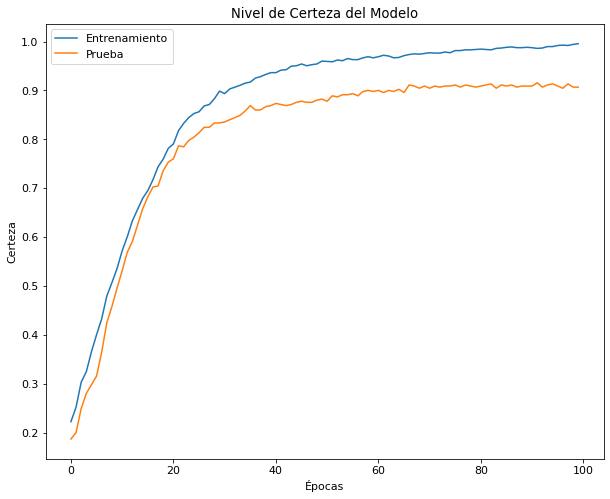

In [11]:
#Resumen del entrenamiento por medio del nivel de certeza (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nivel de Certeza del Modelo')
plt.ylabel('Certeza')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

Ahora se muestra el gráfico del nivel de pérdida (*loss*) de los **DataSet** de entrenamiento y validación a través de las épocas (*epoch*) de entenamiento, con lo cual se puede realizar una comparativa de su desempeño.

La documentación de **Keras** recomienda emplear el código mostrado a continuación, el cual puede ser consultado [en esta liga](https://keras.io/visualization/#training-history-visualization).

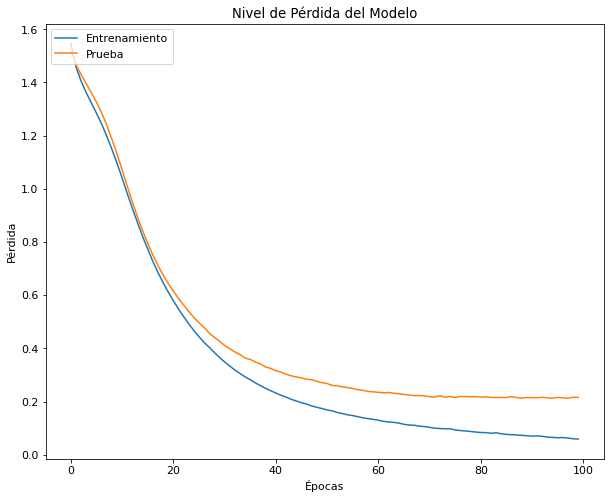

In [12]:
#Resumen del entrenamiento por medio de la pérdida (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nivel de Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

### Predicción de un Valor en Particular

Para generar una predicción del costo en base a una serie de valores de un teléfono celular en particular, se considerarán los siguientes valores:

>1. **battery_power**: Total de energía que la batería puede almacenar: ***1500 mAh***.
>2. **blue**: Soporte para Bluetooth: ***Si (1)***. 
>3. **clock_speed**: Velocidad del microprocesador: ***2.5 GHz***.
>4. **dual_sim**: Soporte para tarjeta SIM dual: ***No (0)***.
>5. **fc**: Cantidad de megapixeles de la cámara frontal: ***10 MP***.
>6. **four_g**: Soporte para red 4G: ***Si (1)***.
>7. **int_memory**: Cantidad de memoria interna: ***256 GB***. 
>8. **m_dep**: Profundidad móvil: ***1 cm***.
>9. **mobile_wt**: Peso del dispositivo: ***200 gr***.
>10. **n_cores**: Número de núcleos del procesador: ***8***.
>11. **pc**: Cantidad de megapixeles de la cámara principal: ***15 MP***.
>12. **px_height**: Alto de la resolución: ***1880 pixeles***.
>13. **px_width**: Ancho de la resolución: ***1495 pixeles***.
>14. **ram**: Cantidad de memoria del dispositivo: ***64 MB***. 
>15. **sc_h**: Alto de la pantalla: ***15 cm***.
>16. **sc_w**: Ancho de la pantalla: ***6 cm***.
>17. **talk_time**: Tiempo de llamada con batería completa: ***20 hr***.
>18. **three_g**: Soporte para red 3G: ***Si (1)***.
>19. **touch_screen**: Soporte para pantalla táctil: ***Si (1)***.
>20. **wifi** Soporte para acceso a red inalámbrica WiFi: ***Si (1)***.

El procedimiento para realizar la predicción con base en el modelo entrenado (**model**) se realiza por medio de los siguientes pasos:

1. Se define un arreglo bidimensional de **NumPy** que contenga los 20 valores de las características del celular de interés, para ello se emplea la función `np.array([[]])`.
2. Se realiza la Normalización de los datos de entrada a través del método `StandardScaler()`, el cual realiza la transformación de los datos de manera que su distribución tendrá un valor de media igual a 0 y desviación estándar igual a 1 en los datos del arreglo de **NumPy**. 
3. Se genera la predicción de la salida (el costo del teléfono celular) empleando el arreglo de **NumPy** como los datos de entrada, empleando el método `.predict()` de **Keras** aplicado al modelo entrenado (**model**).
4. Se realiza la conversión del resultado de una categorización (*One Hot Encoded*) a la etiqueta final.
5. Se muestra el resultado.

Esto es:

In [13]:
#Definición del Arreglo con los Valores
arreglo = np.array([[1500, 1,  2.5, 0, 10, 1, 256, 1, 200, 8, 15, 1880, 1495, 64, 15, 6, 20, 1, 1, 1]])

#Normalización de los Datos de Entrada
arreglo = scaler.fit_transform(arreglo)

#Predicciones de la Salida en base a los datos
mo_pred = model.predict(arreglo)

#Conversión de las Predicciones a Etiquetas
predic = list()
for i in range(len(mo_pred)):
    predic.append(np.argmax(mo_pred[i]))

#Impresión de los Resultados    
print("La predicción del costo para las caraterísticas indicadas es: Categoría número", predic)

La predicción del costo para las caraterísticas indicadas es: Categoría número [1]


<div class="alert alert-block alert-success">
<b>.: Fin del Subtema :.</b>
</div>

***Liga de aceso al siguiente Subtema:*** 
<br>[e. Instalación de TensorFlow](e.%20Instalacion%20de%20TensorFlow.ipynb)